#### Imports...

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import warnings
warnings.filterwarnings("ignore")

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
df= pd.read_csv (r'../europe.csv')
df.head(3)

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.8,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.3,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.6,-0.80,9.6


In [22]:
df1 = df.loc[:, df.columns != 'Country']
df1.head(3)

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.8,0.03,4.2
1,30528,37800,3.5,79.65,1.3,0.06,7.2
2,110879,13800,4.2,73.84,2.6,-0.80,9.6


In [5]:
#Estandarizo los datos
df_countries= df["Country"]
df_stand=  StandardScaler().fit_transform(df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]])
df_stand= pd.DataFrame(df_stand, columns=df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]].columns)
df_stand.head(3)

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973


In [27]:
from oja import OJA

o = OJA(data=df_stand, epochs=4000, learningRate=0.0001)
o.run()

### w final usando la Regla de Oja

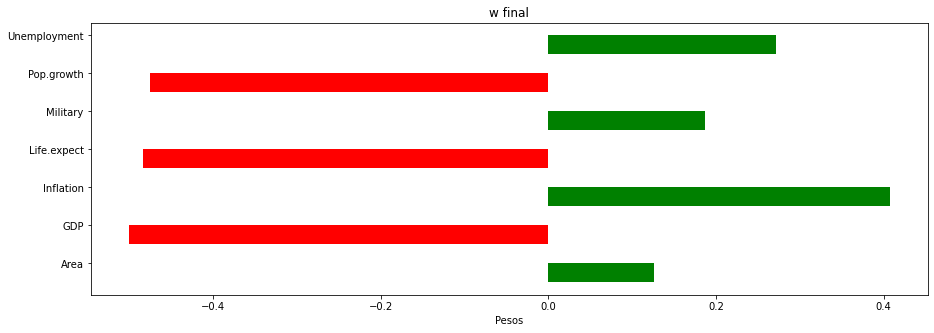

In [34]:
### p e s o s

weights = o.getW()
w_df = pd.DataFrame.from_dict(weights)
w_df['variable'] = df1.columns.values
w_df = w_df.set_index('variable')
w_df

### p l o t t i n g

import matplotlib.pyplot as plt

a = w_df[0]

x = list(a.index)
y = list(a)

fig, ax = plt.subplots(figsize=(15,5))  
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups

cc=['colors']*len(y)
for n,val in enumerate(y):
    if val<0:
        cc[n]='red'
    elif val>=0:
        cc[n]='green'

ax.barh(ind, y, width, color=cc)

ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)

plt.title('w final')
plt.xlabel('Pesos')
plt.show()

### PC1 usando PCA

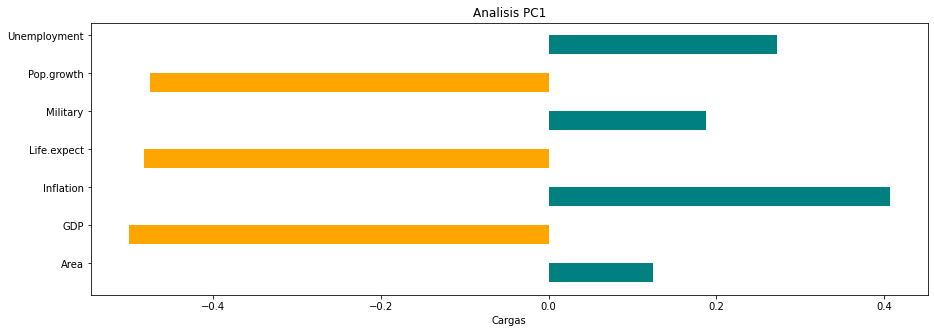

In [33]:
pca_out = PCA().fit(df_stand)

#### L O A D I N G S 

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_stand.columns.values
loadings_df = loadings_df.set_index('variable')

#### P L O T T I N G

import numpy as np
import matplotlib.pyplot as plt

a = loadings_df['PC1']

x = list(a.index)
y = list(a)

fig, ax = plt.subplots(figsize=(15,5))  
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups

cc=['colors']*len(y)
for n,val in enumerate(y):
    if val<0:
        cc[n]='orange'
    elif val>=0:
        cc[n]='teal'

#ax.barh(ind, y, width, color="blue")
ax.barh(ind, y, width, color=cc)

ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)


plt.title('Analisis PC1')
plt.xlabel('Cargas')
plt.show()


### error

In [39]:
import math


error = 0
for i in range(7):
    error += math.fabs(loadings[0][i] - weights[i])

error / 7

0.00038950062300313414